# Point Source Aperture Photometry Test

Here we test point source aperture photometry using SEP against the input model image properties.

### Read in python libraries

In [87]:
%matplotlib inline
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy import interpolate
from sorting_routines import *

### Read in fits image, and set NANs to 0

In [89]:
fname_001 = "sim_cube_F090W_487_001.slp.fits"
fits.info(fname_001)
hdulist = fits.open(fname_001)
data_001 = hdulist[0].data[0]
data_001 = data_001.byteswap().newbyteorder()
print np.size(data_001)
for i in range(2048):
    for j in range(2048):
        if(np.isnan(data_001[i,j])):
            data_001[i,j] = 0




Filename: sim_cube_F090W_487_001.slp.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     133   (2048, 2048, 2)   float32   
4194304


### Use SEP to create a background image

In [ ]:
bkg = sep.Background(data_001)

### Get the zeropoint of the image from the FITS header

In [90]:
#print hdulist[0].header
m_ab_zeropoint = hdulist[0].header['ABMAG']
print m_ab_zeropoint

27.1504


### Plot the input image

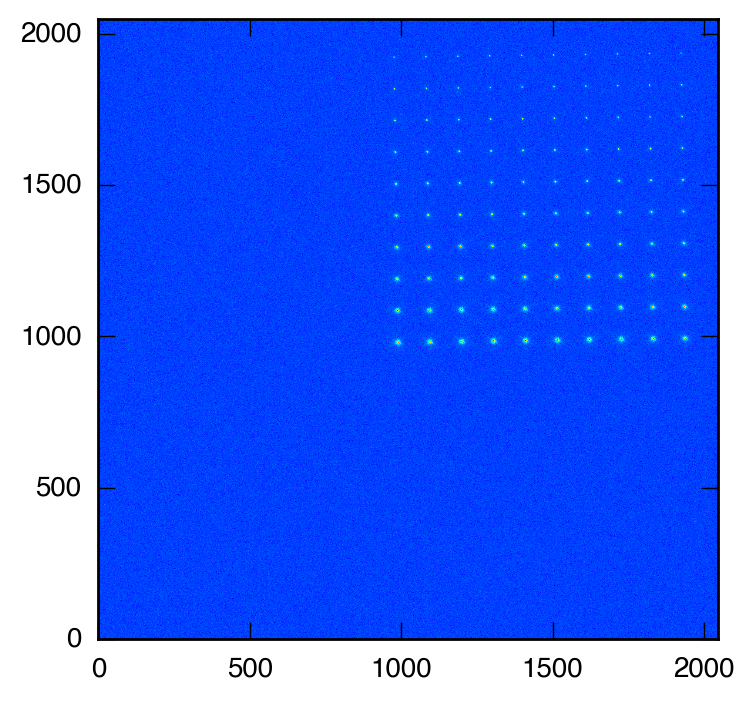

In [62]:
plt.imshow(np.log10( data_001 - data_001.min() + 1.0e-3*data_001.max() ),origin="lower")

### Plot the background image

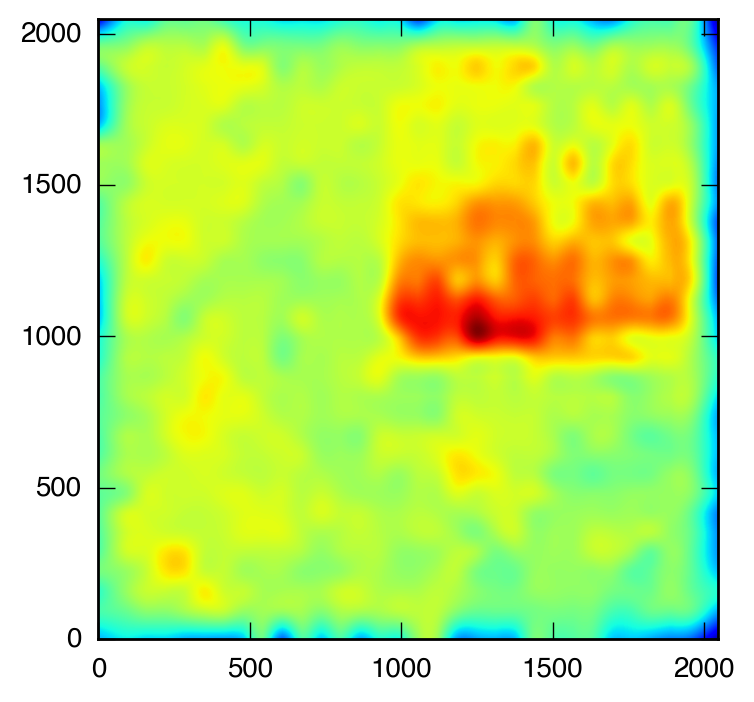

In [91]:
plt.imshow(bkg,origin="lower")

### Create a background-subtracted image

In [92]:
#subtract background
data_sub = data_001 - bkg

### Plot the background-subtracted image

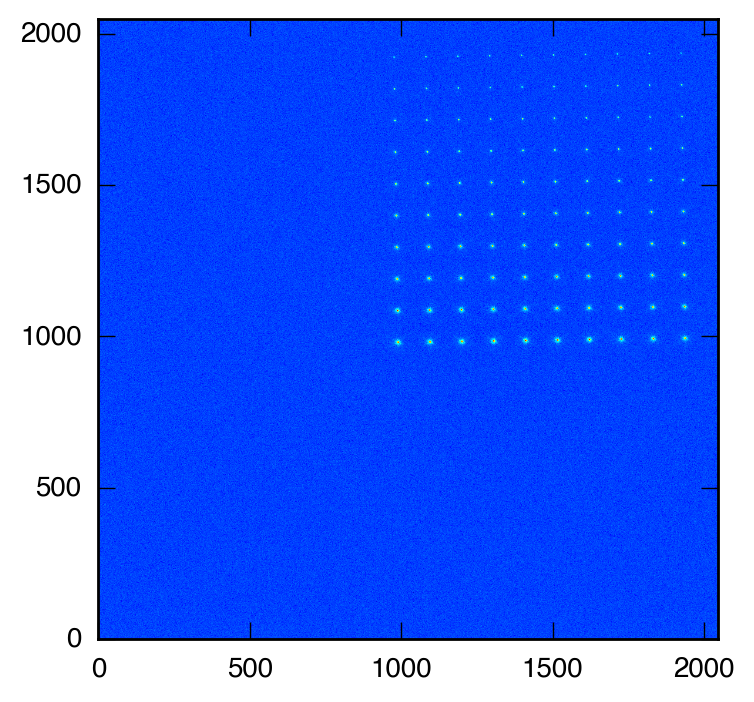

In [93]:
plt.imshow(np.log10( data_sub - data_sub.min() + 1.0e-3*data_sub.max() ),origin="lower")

### Perform object detection with SEP, set at a 3sigma threshold

In [94]:
objects = sep.extract(data_sub, 3.0, err=bkg.globalrms)
objects_w_bkg = sep.extract(data_001, 3.0, err=bkg.globalrms)

### Show that we found the right number of images

In [95]:
print len(objects)

100


### Perform photometry within 35 pixel radius apertures on background-subtracted objects

In [96]:
pixel_radius = 35
print pixel_radius
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], pixel_radius, err=bkg.globalrms, gain=1.0)

35


### Repeat for objects, including the background for comparison

In [70]:
flux_w_bkg, fluxerr_w_bkg, flag_w_bkg = sep.sum_circle(data_001, objects['x'], objects['y'], pixel_radius, err=bkg.globalrms, gain=1.0)

### Print the measured fluxes for each bkg-subtracted object

In [97]:
print flux

[ 11103.08836674  10577.1287318   10206.62825509   9670.2118509
   9344.35323891   9098.61350545   8760.50781402   8578.68472287
   8209.21310754   7967.017989     7453.18204743   7191.32941746
   6806.38909426   6342.53897257   6625.6942454    6138.21195507
   5971.01082606   5726.60555908   5538.36353771   5423.81027756
   5198.76284741   4923.41358766   4809.29441946   4601.35397927
   4304.12549039   3985.0986306    4060.88577807   3920.83679673
   3864.33383976   3616.64010647   3577.17936297   3433.34704786
   3317.5772751    3137.73030308   3005.52610068   2892.41725757
   2779.54361701   2692.25858731   2592.44382865   2483.73138803
   2450.75503766   2373.09639168   2171.32548739   1992.75587818
   2089.92480484   1989.16241482   1822.77637356   1797.92658131
   1807.45964535   1720.37067686   1659.09874365   1611.00286144
   1481.32767251   1534.28444006   1443.62158148   1448.68044871
   1323.56700662   1224.76724801   1302.38324902   1191.73840067
   1120.72411007   1086.32

### Repeat for objects with bkg included

In [98]:
print flux_w_bkg

[ 11363.81627302  10969.25956446  10599.41294789  10093.12977075
   9769.20057023   9439.90013054   9047.53831196   8829.49006037
   8432.03834347   8159.75907857   7848.17601992   7633.04380656
   7243.63989741   6760.17693826   7052.51460245   6533.32248861
   6309.69043447   6081.11595029   5879.57668563   5683.96869359
   5507.9067766    5299.0128904    5105.61390442   4881.85593042
   4682.95075754   4341.9320761    4364.3406385    4244.50274727
   4142.00524943   3893.67694918   3829.42455019   3727.86890182
   3629.69893915   3432.10713787   3348.84396304   3175.03628821
   3067.1400258    2957.52518467   2818.52221087   2755.92411192
   2688.69533386   2641.11381962   2468.95966852   2311.56026791
   2427.79715157   2206.75466025   2106.25275701   2106.97424157
   2049.33133936   1963.07737286   1870.78010196   1845.73067159
   1733.77946135   1759.8833015    1708.13412664   1642.60201613
   1510.80278554   1485.48273835   1505.12600472   1388.83342589
   1329.68104252   1296.4

### Compute the AB magnitude of the objects, and sort by increasing flux

In [99]:
mag_sep =  -2.5*np.log10(flux) + m_ab_zeropoint
idx = sorted_index(-1.*mag_sep)
mag_sep = mag_sep[idx]
print mag_sep

[ 21.1042039   21.04742867  20.98230588  20.93864439  20.92390047
  20.92147806  20.80965339  20.78294151  20.70380737  20.67987015
  20.65440481  20.54295811  20.53721687  20.53608082  20.52760887
  20.5268033   20.44757412  20.39926636  20.34167446  20.33633825
  20.30711564  20.29950118  20.27626015  20.12948546  20.09740162
  19.9953875   19.99510231  19.96899698  19.92288391  19.84499468
  19.8446751   19.81556212  19.7905164   19.7581632   19.71359862
  19.67239806  19.57965344  19.56049766  19.52665321  19.50276351
  19.45994767  19.43026609  19.363553    19.34603517  19.25176659
  19.2479685   19.22377216  19.1856353   19.13265922  19.10071941
  19.06134492  19.01347012  19.00772848  18.99856652  18.90372439
  18.90176475  18.85007335  18.80858767  18.71211155  18.67715024
  18.66263844  18.61612661  18.57510807  18.54046627  18.49724764
  18.45559874  18.40886097  18.34834738  18.31110574  18.26654821
  18.25463676  18.1827134   18.16695309  18.14930231  18.12884806
  18.06568

### Read in the input catalog

In [100]:
fname = "stars_f090w.cat"
fp = open(fname,"r")
fl = fp.readlines()
fp.close()

### Parse the input catalog (first line was deleted), and print the input catalog magnitudes

In [102]:
nexp = 4
nobj = len(fl)/nexp
j = 0

mag_cat    = np.zeros([nexp,nobj])
f_real_cat = np.zeros([nexp,nobj])
f_true_cat = np.zeros([nexp,nobj])

for k in range(nexp):
    for i in range(nobj):
        mag_cat[k,i] = fl[j].split()[5]
        f_real_cat[k,i] = fl[j].split()[8]
        f_true_cat[k,i] = fl[j].split()[7]
        j += 1

print mag_cat[0,:]

[ 21.    20.96  20.92  20.88  20.84  20.8   20.76  20.72  20.68  20.64
  20.6   20.56  20.52  20.48  20.44  20.4   20.36  20.32  20.28  20.24
  20.2   20.16  20.12  20.08  20.04  20.    19.96  19.92  19.88  19.84
  19.8   19.76  19.72  19.68  19.64  19.6   19.56  19.52  19.48  19.44
  19.4   19.36  19.32  19.28  19.24  19.2   19.16  19.12  19.08  19.04  19.
  18.96  18.92  18.88  18.84  18.8   18.76  18.72  18.68  18.64  18.6
  18.56  18.52  18.48  18.44  18.4   18.36  18.32  18.28  18.24  18.2
  18.16  18.12  18.08  18.04  18.    17.96  17.92  17.88  17.84  17.8
  17.76  17.72  17.68  17.64  17.6   17.56  17.52  17.48  17.44  17.4
  17.36  17.32  17.28  17.24  17.2   17.16  17.12  17.08  17.04]


### Print the magnitude difference between the SEP photometry and the input catalog magnitudes.  The SEP magnitudes should typically be fainter (larger mag).

In [104]:
print mag_sep - mag_cat[0,:]

[ 0.1042039   0.08742867  0.06230588  0.05864439  0.08390047  0.12147806
  0.04965339  0.06294151  0.02380737  0.03987015  0.05440481 -0.01704189
  0.01721687  0.05608082  0.08760887  0.1268033   0.08757412  0.07926636
  0.06167446  0.09633825  0.10711564  0.13950118  0.15626015  0.04948546
  0.05740162 -0.0046125   0.03510231  0.04899698  0.04288391  0.00499468
  0.0446751   0.05556212  0.0705164   0.0781632   0.07359862  0.07239806
  0.01965344  0.04049766  0.04665321  0.06276351  0.05994767  0.07026609
  0.043553    0.06603517  0.01176659  0.0479685   0.06377216  0.0656353
  0.05265922  0.06071941  0.06134492  0.05347012  0.08772848  0.11856652
  0.06372439  0.10176475  0.09007335  0.08858767  0.03211155  0.03715024
  0.06263844  0.05612661  0.05510807  0.06046627  0.05724764  0.05559874
  0.04886097  0.02834738  0.03110574  0.02654821  0.05463676  0.0227134
  0.04695309  0.06930231  0.08884806  0.06568769  0.03318589  0.02519659
  0.0397342   0.02064998  0.01463878  0.03194635  0.0

### Define the aperture correction measured from the PSF

In [105]:

#dmag_aperture_correction = 0.204462939361   ## 0.3"
dmag_aperture_correction = 0.0274911626418   ## 35 pixel aperture correction


### Print the SEP mag - true mag - aperture correction

In [106]:
k = 0
print mag_sep - mag_cat[k,:] - dmag_aperture_correction

[ 0.07671274  0.05993751  0.03481472  0.03115323  0.0564093   0.0939869
  0.02216223  0.03545035 -0.00368379  0.01237899  0.02691365 -0.04453305
 -0.01027429  0.02858966  0.0601177   0.09931214  0.06008296  0.0517752
  0.0341833   0.06884709  0.07962448  0.11201001  0.12876899  0.02199429
  0.02991046 -0.03210366  0.00761114  0.02150582  0.01539275 -0.02249648
  0.01718394  0.02807095  0.04302523  0.05067203  0.04610745  0.04490689
 -0.00783772  0.01300649  0.01916205  0.03527235  0.0324565   0.04277493
  0.01606183  0.03854401 -0.01572458  0.02047734  0.036281    0.03814414
  0.02516806  0.03322825  0.03385376  0.02597895  0.06023731  0.09107536
  0.03623323  0.07427359  0.06258219  0.06109651  0.00462039  0.00965908
  0.03514727  0.02863545  0.02761691  0.0329751   0.02975648  0.02810758
  0.02136981  0.00085622  0.00361458 -0.00094295  0.0271456  -0.00477776
  0.01946192  0.04181115  0.0613569   0.03819652  0.00569473 -0.00229457
  0.01224304 -0.00684118 -0.01285239  0.00445519  0.0

### Define a magnitude correction that accounts for the poisson realization of the flux of individual sources in the input catalog.

In [107]:
k = 0
dmag_real = -2.5*np.log10(f_real_cat[k,:]/f_true_cat[k,:])
print dmag_real

[  1.68626588e-02  -2.22496568e-02   1.47692432e-02  -3.68574190e-02
  -2.35857984e-02  -4.73787152e-03  -1.22658047e-02  -3.44948014e-02
   1.68691036e-02   9.40967316e-04   2.02154540e-03  -2.40994530e-02
   2.34868159e-02  -2.50855716e-02  -9.47645394e-03  -1.68712429e-02
  -2.32375086e-02  -9.05503846e-03  -1.64275236e-02  -1.20279373e-02
   1.78394160e-02   4.59399493e-02  -1.93529013e-02  -2.53183891e-02
   1.93984661e-02   2.13689737e-02   8.76210649e-05  -1.79193483e-02
  -2.66491548e-02   9.32596561e-03   2.01402640e-02  -3.93718455e-03
   3.70532006e-03   3.68184630e-03  -2.55685693e-03   1.75956167e-02
  -1.76206122e-02   4.54229136e-03   9.31692786e-04   1.59515420e-03
   1.21450288e-02   7.96972895e-03   1.90562396e-02  -4.84009249e-03
   8.86678832e-03  -5.95191728e-03   1.19718306e-02  -1.27908276e-02
   8.68561342e-03  -1.72123899e-03  -1.07739251e-02  -1.41662000e-04
  -2.18823237e-03  -9.65652686e-03   1.28749576e-03  -8.42520857e-04
   1.99434777e-03   1.74417014e-03

### Measure the overal magnitude error between the input catalog and the SEP photometry

In [108]:
k = 0
dmag_real = -2.5*np.log10(f_real_cat[k,:]/f_true_cat[k,:])
mag_error = mag_sep - mag_cat[k,:] - dmag_aperture_correction - dmag_real
print mag_error

[  5.98500805e-02   8.21871660e-02   2.00454736e-02   6.80106486e-02
   7.99951023e-02   9.87247695e-02   3.44280306e-02   6.99451502e-02
  -2.05528969e-02   1.14380184e-02   2.48921011e-02  -2.04336010e-02
  -3.37611040e-02   5.36752331e-02   6.95941581e-02   1.16183379e-01
   8.33204684e-02   6.08302347e-02   5.06108248e-02   8.08750246e-02
   6.17850591e-02   6.60700633e-02   1.48121888e-01   4.73126830e-02
   1.05119901e-02  -5.34726353e-02   7.52352215e-03   3.94251648e-02
   4.20419055e-02  -3.18224495e-02  -2.95632472e-03   3.20081372e-02
   3.93199147e-02   4.69901879e-02   4.86643105e-02   2.73112769e-02
   9.78289251e-03   8.46420315e-03   1.82303571e-02   3.36771925e-02
   2.03114746e-02   3.48051979e-02  -2.99440669e-03   4.33840981e-02
  -2.45913658e-02   2.64292573e-02   2.43091670e-02   5.09349633e-02
   1.64824444e-02   3.49494902e-02   4.46276836e-02   2.61206162e-02
   6.24255455e-02   1.00731887e-01   3.49457300e-02   7.51161110e-02
   6.05878382e-02   5.93523417e-02

### Plot the flux difference vs. input source flux

0.0259037628323
0.0351587215211
-0.054688358497
-0.0235758892586
0.00856056582694


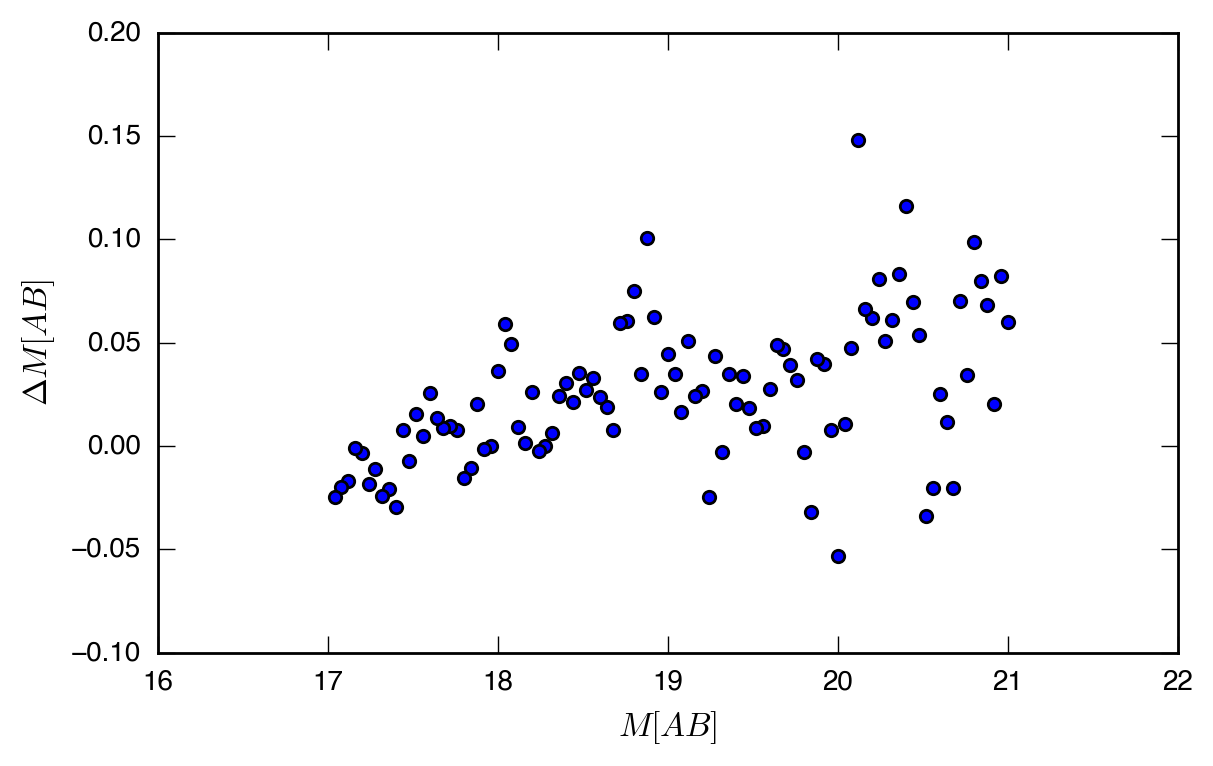

In [109]:
plt.scatter(mag_cat[0,:],mag_error)
plt.xlabel(r'$M [AB]$')
plt.ylabel(r'$\Delta M [AB]$')
print np.mean(mag_error)
print np.std(mag_error)
print 10**(-0.4*(np.mean(mag_error)+np.std(mag_error))) - 1.
print 10**(-0.4*(np.mean(mag_error))) - 1.
print 10**(-0.4*(np.mean(mag_error)-np.std(mag_error))) - 1.

### Repeat for objects with the background included, to demonstrate that failing to correct the background flux leads to sources that are too bright (with negative magnitude differences) compared with the input catalogs.

In [113]:
mag_sep_w_bkg =  -2.5*np.log10(flux_w_bkg) + m_ab_zeropoint
idx = sorted_index(-1.*mag_sep_w_bkg)
mag_sep_w_bkg = mag_sep_w_bkg[idx]
print mag_sep_w_bkg

[ 20.61117841  20.59255327  20.52673956  20.48507852  20.38764992
  20.3780489   20.3417309   20.32862405  20.29363953  20.27698882
  20.26599747  20.21807676  20.21659376  20.20417266  20.12662037
  20.10551666  20.09289659  20.04338031  20.01114213  19.9968416
  19.97581339  19.9631783   19.94771775  19.89531027  19.80379239
  19.78219367  19.72465354  19.72189097  19.66588702  19.62362938
  19.59790737  19.57293959  19.57155864  19.51815862  19.47564944
  19.47317749  19.36848458  19.36352576  19.34208844  19.34103131
  19.2937746   19.22073098  19.20646785  19.20238056  19.11156912
  19.06909508  19.05291537  19.03669032  18.98497918  18.97034314
  18.91805646  18.87136955  18.84162378  18.84125193  18.79101487
  18.74063695  18.68736901  18.66911501  18.59593221  18.57654602
  18.54973186  18.52534635  18.47307887  18.43356599  18.39602827
  18.33816272  18.31149791  18.25072349  18.22174842  18.19256621
  18.17450021  18.10737339  18.08083295  18.05619244  18.0506034
  17.9741010

In [114]:
k = 0
dmag_real = -2.5*np.log10(f_real_cat[k,:]/f_true_cat[k,:])
mag_error_w_bkg =  mag_sep_w_bkg - mag_cat[k,:] - dmag_aperture_correction - dmag_real

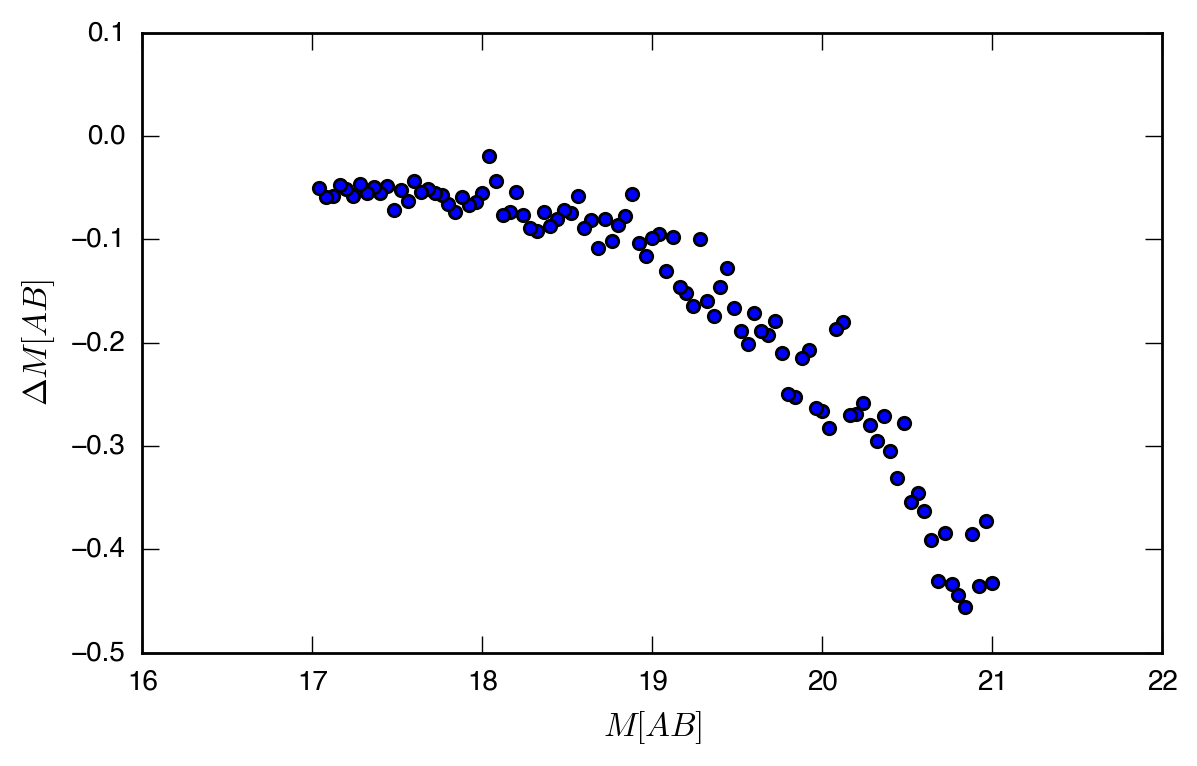

In [115]:
plt.scatter(mag_cat[0,:],mag_error_w_bkg)
plt.xlabel(r'$M [AB]$')
plt.ylabel(r'$\Delta M [AB]$')